In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import log_loss

In [14]:
df = pd.read_csv("Road.csv")

In [16]:
df1 = df[['Age_band_of_driver','Sex_of_driver','Area_accident_occured','Road_surface_conditions','Light_conditions','Weather_conditions','Accident_severity']]

In [18]:
df1.isna().sum()

Age_band_of_driver           0
Sex_of_driver                0
Area_accident_occured      239
Road_surface_conditions      0
Light_conditions             0
Weather_conditions           0
Accident_severity            0
dtype: int64

In [20]:
df1.dropna(inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22416\3614008390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [22]:
df1.isna().sum()

Age_band_of_driver         0
Sex_of_driver              0
Area_accident_occured      0
Road_surface_conditions    0
Light_conditions           0
Weather_conditions         0
Accident_severity          0
dtype: int64

In [24]:
df1.shape

(12077, 7)

In [26]:
valueCounts = []
valueCounts.append(df1['Age_band_of_driver'].unique())
valueCounts.append(df1['Sex_of_driver'].unique())
valueCounts.append(df1['Area_accident_occured'].unique())
valueCounts.append(df1['Road_surface_conditions'].unique())
valueCounts.append(df1['Light_conditions'].unique())
valueCounts.append(df1['Weather_conditions'].unique())
valueCounts.append(df1['Accident_severity'].unique())

In [28]:
for i in range(len(valueCounts)):
    print(valueCounts[i])

['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
['Male' 'Female' 'Unknown']
['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' 'Other' ' Church areas' '  Market areas' 'Unknown'
 'Rural village areas' ' Outside rural areas' ' Hospital areas'
 'School areas' 'Rural village areasOffice areas' 'Recreational areas']
['Dry' 'Wet or damp' 'Snow' 'Flood over 3cm. deep']
['Daylight' 'Darkness - lights lit' 'Darkness - no lighting'
 'Darkness - lights unlit']
['Normal' 'Raining' 'Raining and Windy' 'Cloudy' 'Other' 'Windy' 'Snow'
 'Unknown' 'Fog or mist']
['Slight Injury' 'Serious Injury' 'Fatal injury']


In [30]:
df2 = df1.replace('Unknown', np.nan)

df2.isna().sum()

In [33]:
df2.dropna(inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

In [37]:
df1 = df1.rename(columns={'Age_band_of_driver':'Age','Sex_of_driver':'Gender','Area_accident_occured':'Area','Road_surface_conditions':'Road_Condition','Light_conditions':'Light_Condition','Weather_conditions':'Weather_Condition','Accident_severity':'Severity'})

In [39]:
df1.head()

,Age,Gender,Area,Road_Condition,Light_Condition,Weather_Condition,Severity
0,18-30,Male,Residential areas,Dry,Daylight,Normal,Slight Injury
1,31-50,Male,Office areas,Dry,Daylight,Normal,Slight Injury
2,18-30,Male,Recreational areas,Dry,Daylight,Normal,Serious Injury
3,18-30,Male,Office areas,Dry,Darkness - lights lit,Normal,Slight Injury
4,18-30,Male,Industrial areas,Dry,Darkness - lights lit,Normal,Slight Injury


In [41]:
df1['Area'] = df1['Area'].str.strip()

In [43]:
print(df1['Area'].unique())

['Residential areas' 'Office areas' 'Recreational areas'
 'Industrial areas' 'Other' 'Church areas' 'Market areas' 'Unknown'
 'Rural village areas' 'Outside rural areas' 'Hospital areas'
 'School areas' 'Rural village areasOffice areas']


In [45]:
df1['Area'] = df1['Area'].replace('Rural village areasOffice areas','Rural village areas')

In [47]:
print(df1['Area'].unique())

['Residential areas' 'Office areas' 'Recreational areas'
 'Industrial areas' 'Other' 'Church areas' 'Market areas' 'Unknown'
 'Rural village areas' 'Outside rural areas' 'Hospital areas'
 'School areas']


In [49]:
df1.head()

,Age,Gender,Area,Road_Condition,Light_Condition,Weather_Condition,Severity
0,18-30,Male,Residential areas,Dry,Daylight,Normal,Slight Injury
1,31-50,Male,Office areas,Dry,Daylight,Normal,Slight Injury
2,18-30,Male,Recreational areas,Dry,Daylight,Normal,Serious Injury
3,18-30,Male,Office areas,Dry,Darkness - lights lit,Normal,Slight Injury
4,18-30,Male,Industrial areas,Dry,Darkness - lights lit,Normal,Slight Injury


In [51]:
urban_areas = ['Recreational areas', 'Church areas', 'Office areas', 'Market areas', 'Hospital areas', 'School areas']
rural_areas = ['Rural village areas', 'Outside rural areas']

df1['Area'] = df1['Area'].replace(urban_areas, 'Urban areas')
df1['Area'] = df1['Area'].replace(rural_areas, 'Rural areas')

# Combine weather conditions
raining_windy = ['Raining', 'Raining and Windy', 'Windy', 'Snow']
df1['Weather_Condition'] = df1['Weather_Condition'].replace(raining_windy, 'Raining and Windy')
df1['Weather_Condition'] = df1['Weather_Condition'].replace(['Cloudy', 'Normal'], 'Normal')

# Combine light conditions
night_time = ['Darkness - lights lit', 'Darkness - no lighting', 'Darkness - lights unlit']
df1['Light_Condition'] = df1['Light_Condition'].replace(night_time, 'Night time')

# Combine road conditions
wet_conditions = ['Wet or damp', 'Snow', 'Flood over 3cm. deep']
df1['Road_Condition'] = df1['Road_Condition'].replace(wet_conditions, 'Wet')


print(df1)

           Age  Gender               Area Road_Condition Light_Condition  \
0        18-30    Male  Residential areas            Dry        Daylight   
1        31-50    Male        Urban areas            Dry        Daylight   
2        18-30    Male        Urban areas            Dry        Daylight   
3        18-30    Male        Urban areas            Dry      Night time   
4        18-30    Male   Industrial areas            Dry      Night time   
...        ...     ...                ...            ...             ...   
12311    31-50    Male        Rural areas            Dry        Daylight   
12312  Unknown    Male        Rural areas            Dry        Daylight   
12313  Over 51    Male        Rural areas            Dry        Daylight   
12314    18-30  Female        Urban areas            Dry      Night time   
12315    18-30    Male        Rural areas            Dry      Night time   

      Weather_Condition        Severity  
0                Normal   Slight Injury  
1  

In [53]:
df1.head()

,Age,Gender,Area,Road_Condition,Light_Condition,Weather_Condition,Severity
0,18-30,Male,Residential areas,Dry,Daylight,Normal,Slight Injury
1,31-50,Male,Urban areas,Dry,Daylight,Normal,Slight Injury
2,18-30,Male,Urban areas,Dry,Daylight,Normal,Serious Injury
3,18-30,Male,Urban areas,Dry,Night time,Normal,Slight Injury
4,18-30,Male,Industrial areas,Dry,Night time,Normal,Slight Injury


In [55]:
print(df1['Age'].unique())

['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']


In [46]:

age_categories = ['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown']
age_dfs = {}


for age in age_categories:
    age_dfs[age] = df1[df1['Age'] == age]
    file_name = f"data_{age.replace(' ', '_').replace('-', '_')}.csv"
    age_dfs[age].to_csv(file_name, index=False)

print("CSV files saved for each age category:")
print(list(age_dfs.keys()))

CSV files saved for each age category:
['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown']


In [57]:
df2 = pd.read_csv("data_18_30.csv")

In [59]:
#Ordinal Encoder
df2['Age'] = ordinal_encoder.fit_transform(df2[['Age']])
df2['Road_Condition'] = ordinal_encoder.fit_transform(df2[['Road_Condition']])
df2['Light_Condition'] = ordinal_encoder.fit_transform(df2[['Light_Condition']])
df2['Severity'] = ordinal_encoder.fit_transform(df2[['Severity']])

In [61]:
#Label Encoder
df2['Gender'] = label_encoder.fit_transform(df2['Gender'])
df2['Weather_Condition'] = label_encoder.fit_transform(df2['Weather_Condition'])

In [63]:
#One Hot Encoding
dummies = pd.get_dummies(df2.Area)
dummies = dummies.astype(int)
dummies

,Industrial areas,Other,Residential areas,Rural areas,Unknown,Urban areas
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
4185,0,0,0,1,0,0
4186,0,0,0,1,0,0
4187,0,0,0,1,0,0
4188,0,0,0,0,0,1


In [65]:
df2 = pd.concat([df2, dummies], axis='columns')
df2.head(3)

,Age,Gender,Area,Road_Condition,Light_Condition,Weather_Condition,Severity,Industrial areas,Other,Residential areas,Rural areas,Unknown,Urban areas
0,0.0,1,Residential areas,0.0,0.0,1,2.0,0,0,1,0,0,0
1,0.0,1,Urban areas,0.0,0.0,1,1.0,0,0,0,0,0,1
2,0.0,1,Urban areas,0.0,1.0,1,2.0,0,0,0,0,0,1


In [67]:
df2.drop(['Area'],axis=1, inplace=True)

In [69]:
df2.drop(['Age'],axis=1, inplace=True)

In [71]:
df2.drop(['Gender'],axis=1, inplace=True)

In [73]:
df2.head()

,Road_Condition,Light_Condition,Weather_Condition,Severity,Industrial areas,Other,Residential areas,Rural areas,Unknown,Urban areas
0,0.0,0.0,1,2.0,0,0,1,0,0,0
1,0.0,0.0,1,1.0,0,0,0,0,0,1
2,0.0,1.0,1,2.0,0,0,0,0,0,1
3,0.0,1.0,1,2.0,1,0,0,0,0,0
4,0.0,0.0,1,2.0,0,0,1,0,0,0


In [66]:
df2.to_csv('18_30Processed.csv', index=False, encoding='utf-8')

In [75]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from mlxtend.frequent_patterns import apriori, association_rules

Decision Tree Classification Report:
              precision    recall  f1-score   support

      Slight       0.00      0.00      0.00        27
     Serious       0.50      0.01      0.01       166
       Fatal       0.85      1.00      0.92      1064

    accuracy                           0.85      1257
   macro avg       0.45      0.34      0.31      1257
weighted avg       0.78      0.85      0.78      1257


Decision Tree Rules:
|--- Industrial areas <= 0.50
|   |--- Urban areas <= 0.50
|   |   |--- Weather_Condition <= 1.50
|   |   |   |--- Road_Condition <= 0.50
|   |   |   |   |--- Rural areas <= 0.50
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- Rural areas >  0.50
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- Road_Condition >  0.50
|   |   |   |   |--- Residential areas <= 0.50
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- Residential areas >  0.50
|   |   |   |   |   |--- class: 2.0
|   |   |--- Weather_Condition >  1.50
|   |   |   |--- Light_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


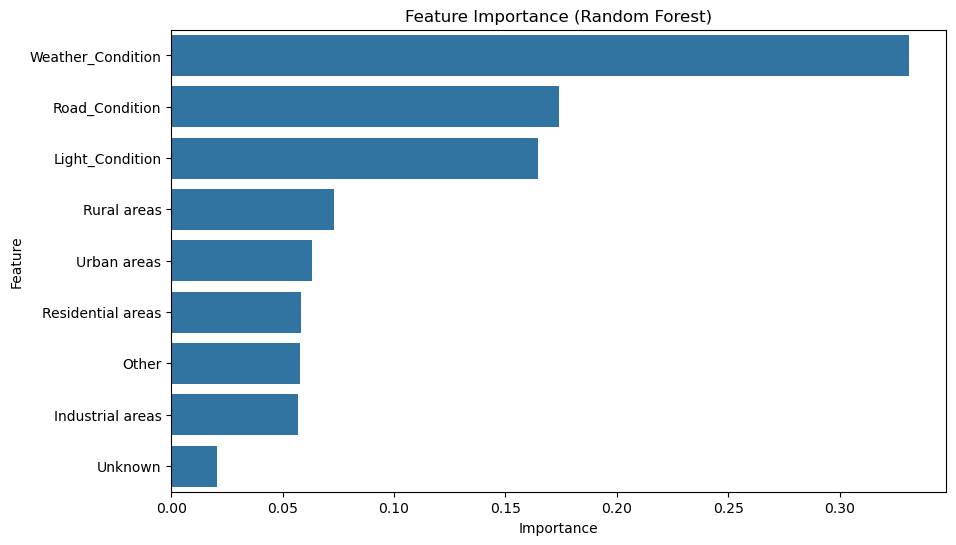


Serious Severity Rules:
|--- class: 0


Slight Severity Rules:
|--- class: 0


Association Rules for Serious Severity:
                                          antecedents  \
13              (Weather_Condition_Raining and windy)   
26            (Residential areas, Road_Condition_Dry)   
20                        (Road_Condition_Dry, Other)   
47  (Light_Condition_Daylight, Road_Condition_Dry,...   
39     (Light_Condition_Daylight, Road_Condition_Dry)   
12                               (Road_Condition_Dry)   
45        (Light_Condition_Night, Road_Condition_Dry)   
33                  (Urban areas, Road_Condition_Dry)   
53  (Light_Condition_Daylight, Urban areas, Road_C...   
46  (Light_Condition_Daylight, Weather_Condition_N...   
28      (Light_Condition_Daylight, Residential areas)   
22                  (Light_Condition_Daylight, Other)   
14                         (Light_Condition_Daylight)   
38  (Light_Condition_Daylight, Weather_Condition_N...   
35            (Light_Cond

C:\ProgramData\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [77]:

data = pd.read_csv('18_30Processed.csv')

# Mapping dictionaries for interpretability
light_condition_mapping = {0.0: 'Daylight', 1.0: 'Night'}
weather_condition_mapping = {
    0.0: 'Fog or Mist', 1.0: 'Normal', 2.0: 'Other',
    3.0: 'Raining and windy', 4.0: 'Unknown'
}
road_condition_mapping = {0.0: 'Dry', 1.0: 'Wet'}
severity_mapping = {2.0: 'Slight', 1.0: 'Serious', 0.0: 'Fatal'}

# Splitting features and target
X = data.drop(columns=['Severity'])
y = data['Severity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier for interpretability
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Classification report for Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=severity_mapping.values()))

# Extract decision rules
dt_rules = export_text(dt, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
print(dt_rules)

# Random Forest Classifier for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance plot
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()

# Serious and Slight severity filtering
serious_indices = y_train[y_train == 1.0].index
slight_indices = y_train[y_train == 2.0].index

X_serious = X_train.loc[serious_indices]
X_slight = X_train.loc[slight_indices]

# Train separate Decision Trees for Serious and Slight
dt_serious = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_serious.fit(X_serious, y_train.loc[serious_indices])
dt_slight = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_slight.fit(X_slight, y_train.loc[slight_indices])

# Extract rules for each severity level
serious_rules = export_text(dt_serious, feature_names=list(X.columns))
slight_rules = export_text(dt_slight, feature_names=list(X.columns))

print("\nSerious Severity Rules:")
print(serious_rules)

print("\nSlight Severity Rules:")
print(slight_rules)


def one_hot_encode(df, mappings):
    encoded = df.copy()
    for col, mapping in mappings.items():
        if col in encoded.columns:
            encoded[col] = encoded[col].map(mapping)
    return pd.get_dummies(encoded)

# One-hot encode for association rule mining
one_hot_data = one_hot_encode(X, {
    'Road_Condition': road_condition_mapping,
    'Light_Condition': light_condition_mapping,
    'Weather_Condition': weather_condition_mapping
})

# Filter serious cases
df_serious = one_hot_data[y == 1.0]
apriori_results = apriori(df_serious, min_support=0.1, use_colnames=True)
rules = association_rules(apriori_results, metric="confidence", num_itemsets=apriori_results, min_threshold=0.6)

print("\nAssociation Rules for Serious Severity:")
print(rules.sort_values(by='confidence', ascending=False))




C:\Users\Administrator\AppData\Local\Temp\ipykernel_22416\3870761006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_mapped, palette="gray")


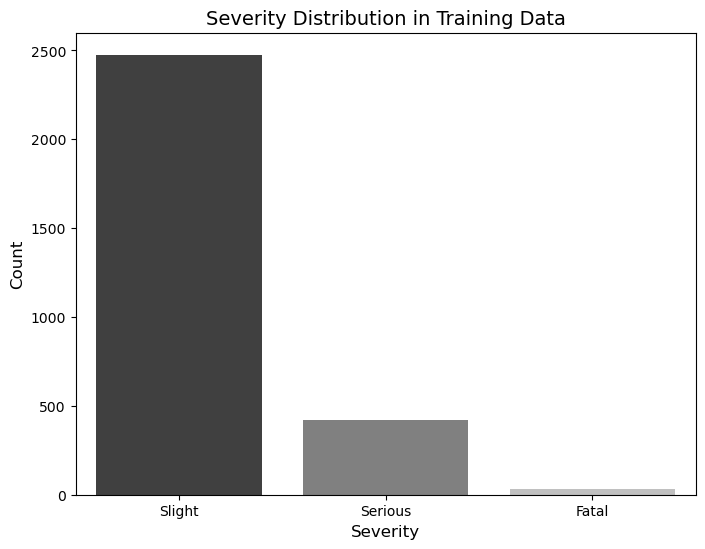

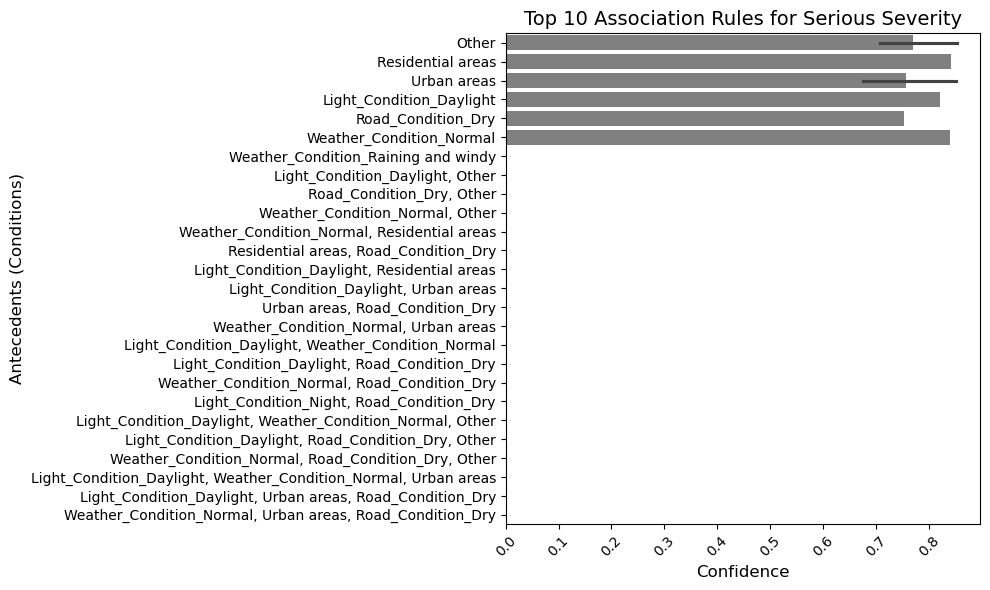

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22416\3870761006.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


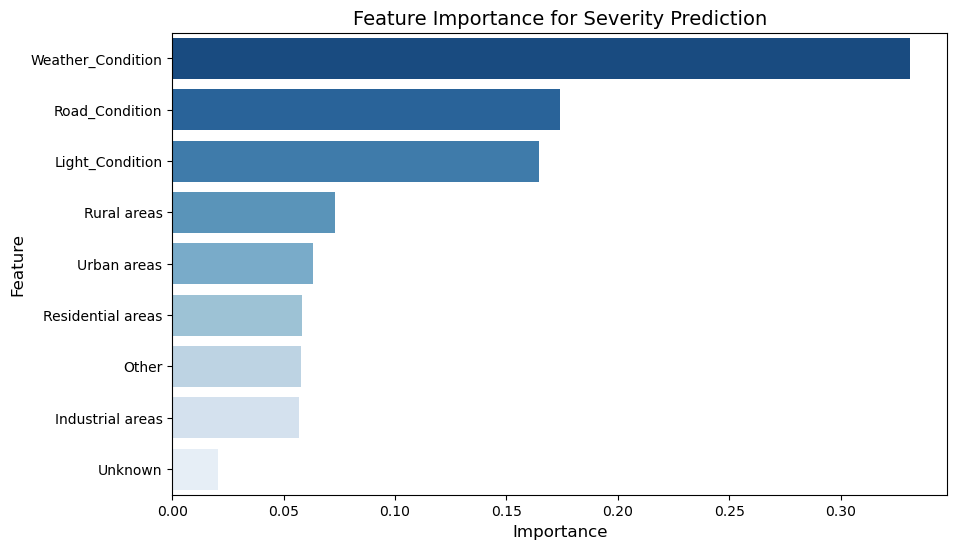

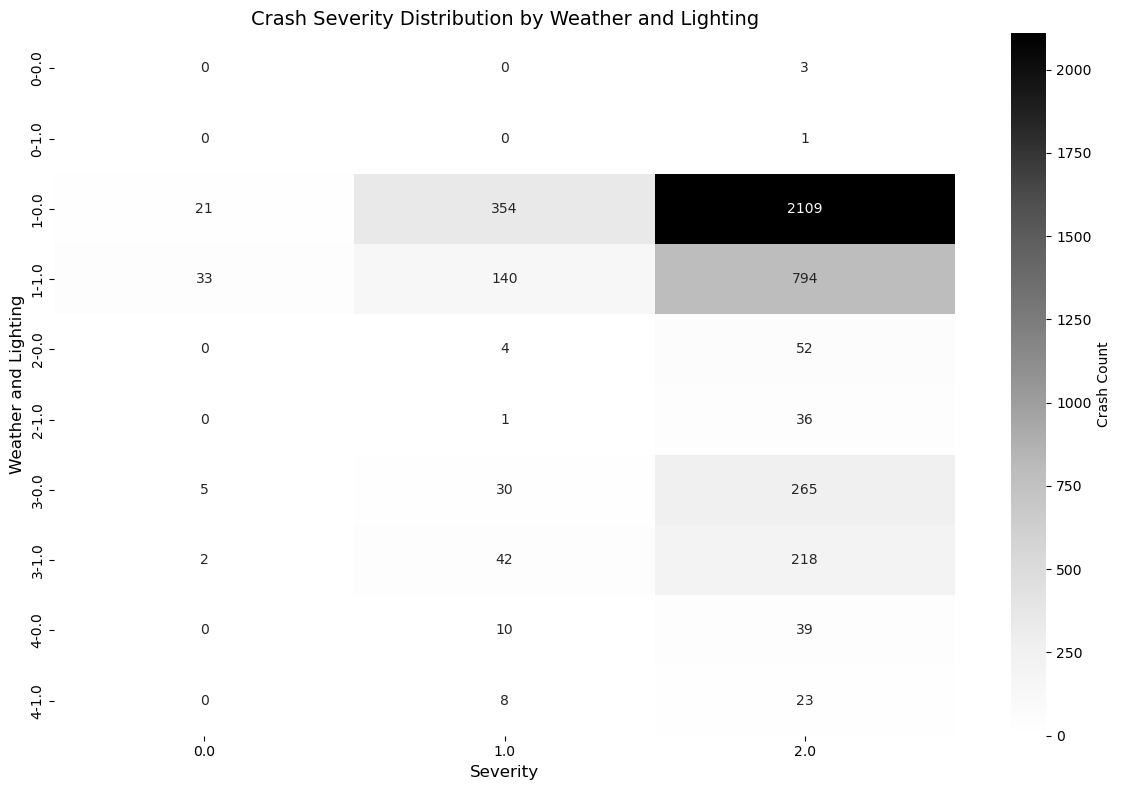

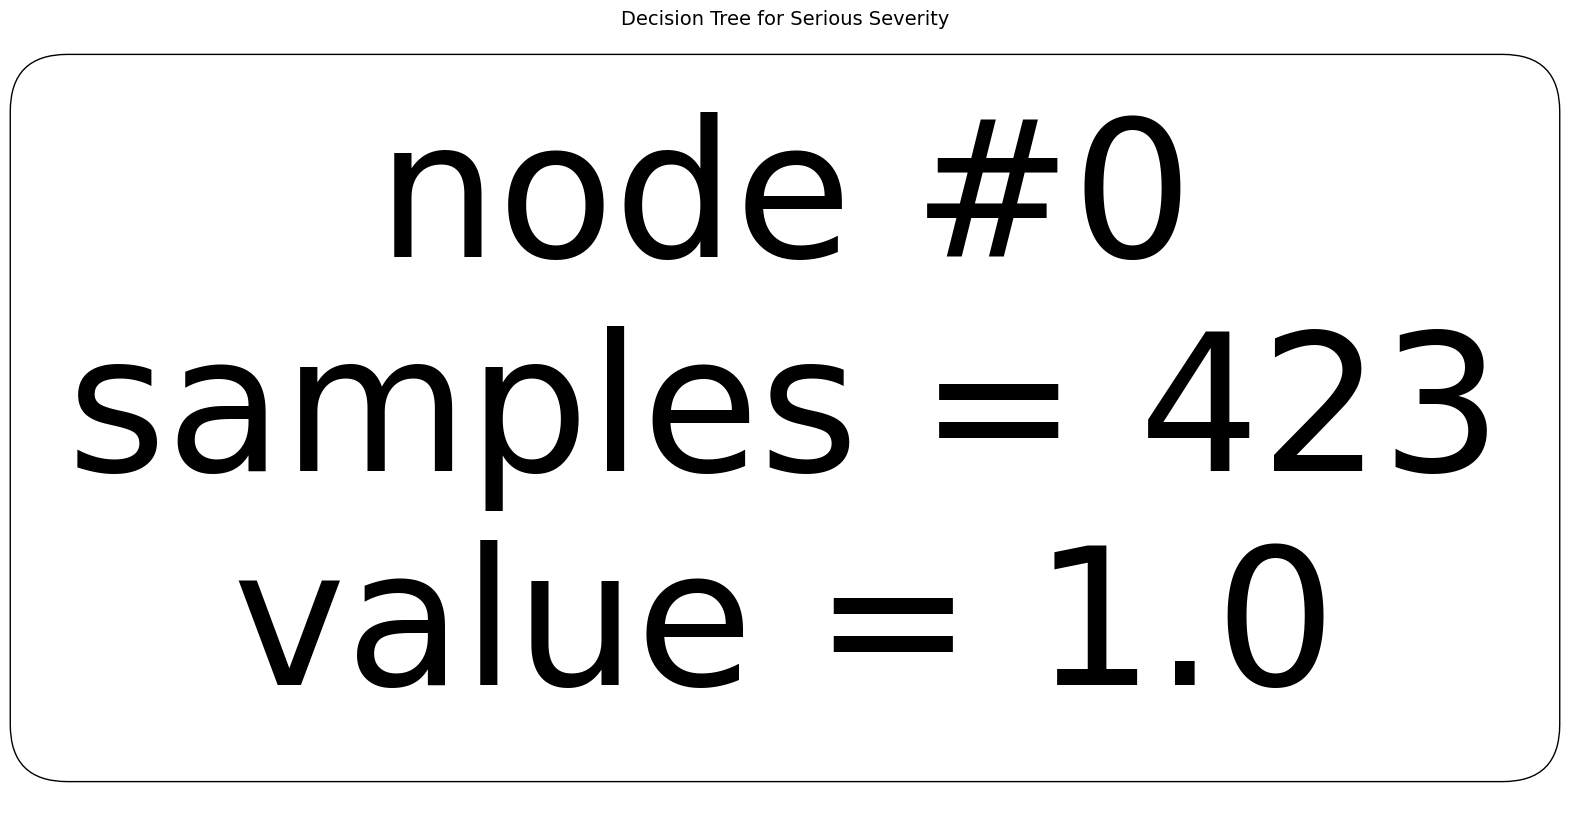

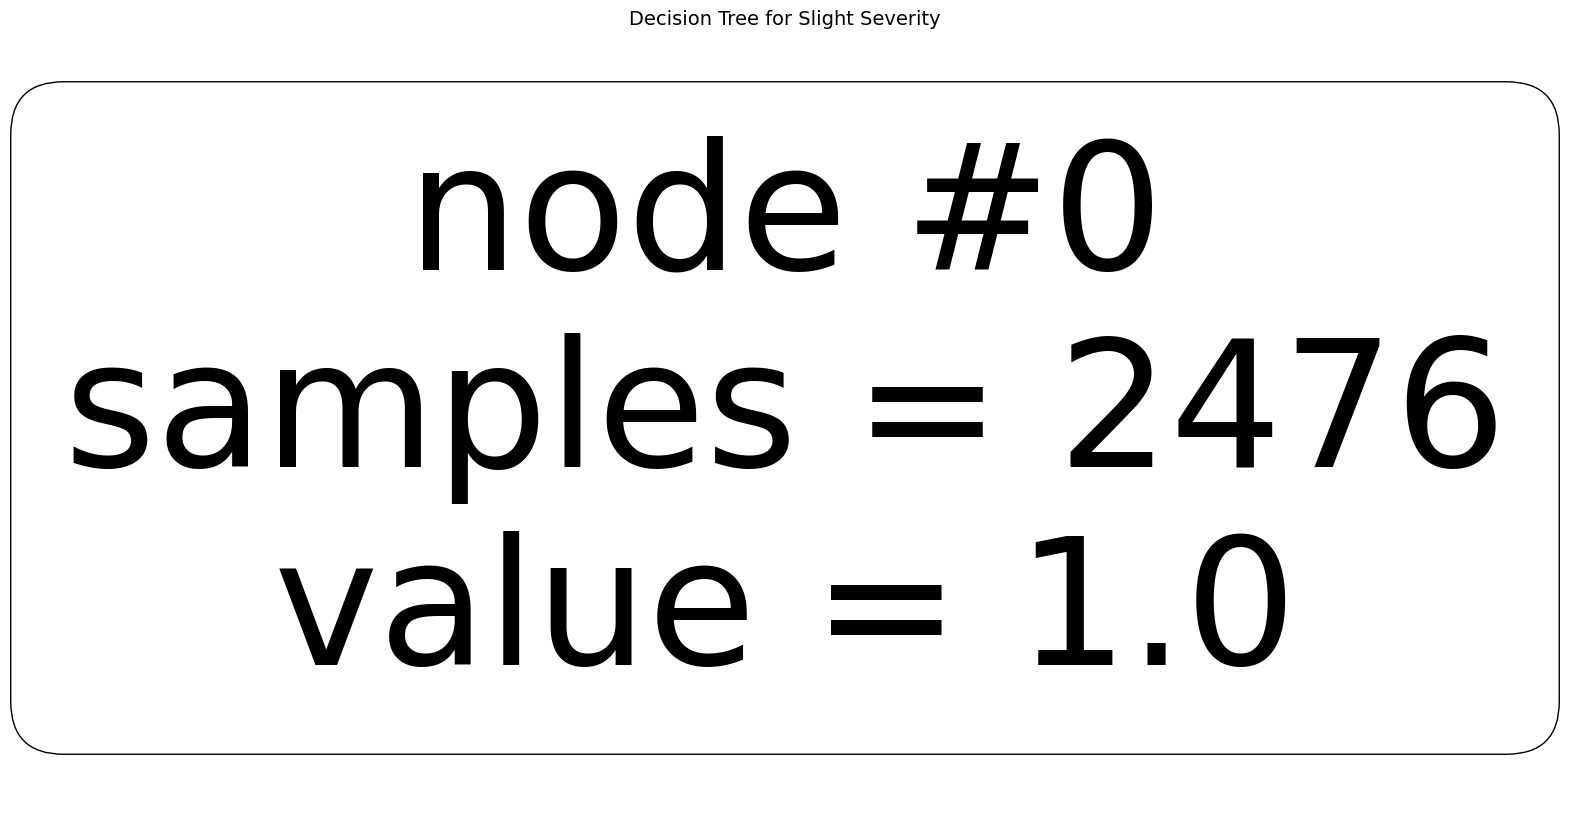

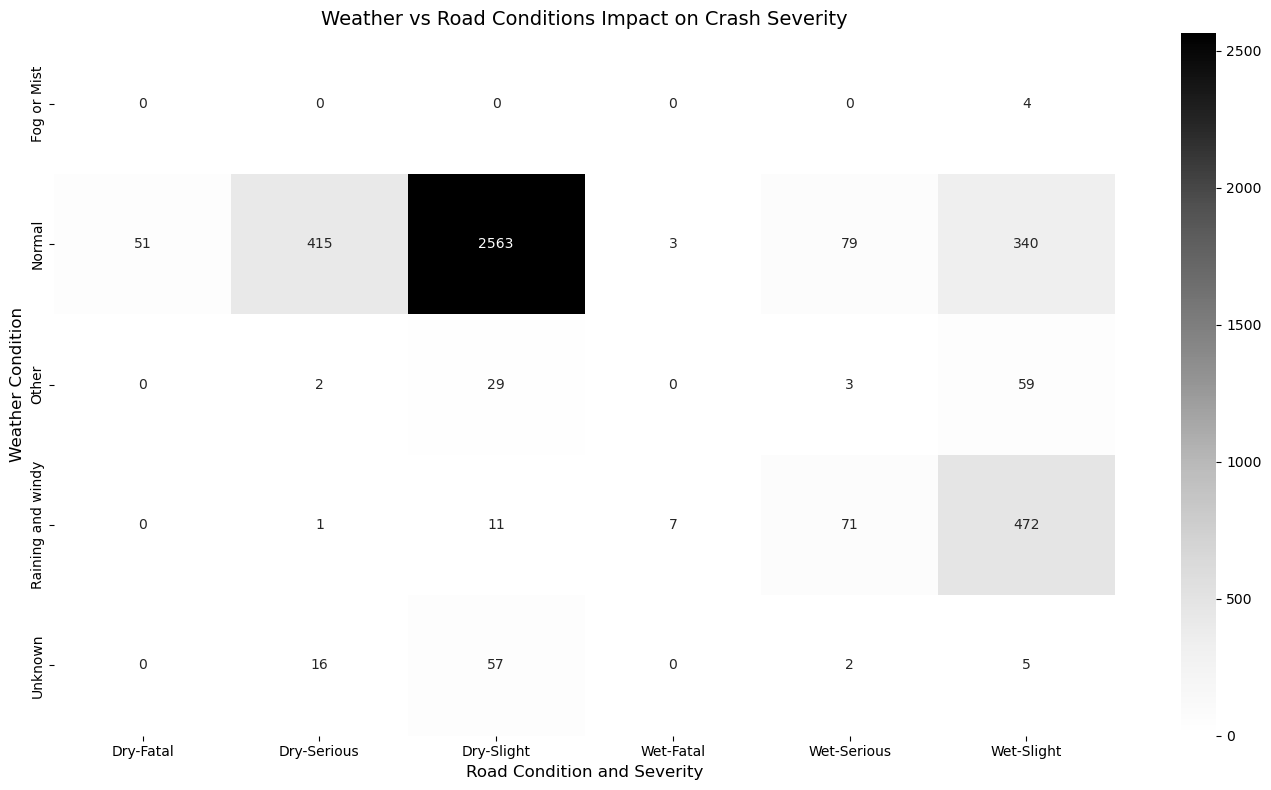

In [79]:

y_train_mapped = y_train.map(severity_mapping)
y_test_mapped = y_test.map(severity_mapping)
# 1. Visualization: Severity Distribution for Training Data
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_mapped, palette="gray")
plt.title('Severity Distribution in Training Data', fontsize=14)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 2. Visualization: Rules Derived for Serious and Slight Crashes
# Focus on the association rules derived for Serious cases
serious_rules_filtered = rules[(rules['confidence'] > 0.6) & (rules['lift'] > 1.0)]

# Plot top rules for serious crashes
plt.figure(figsize=(10, 6))
sns.barplot(
    data=serious_rules_filtered.head(10),
    x='confidence',
    y=serious_rules_filtered['antecedents'].apply(lambda x: ', '.join(list(x))),
    color='gray'
)
plt.title('Top 10 Association Rules for Serious Severity', fontsize=14)
plt.xlabel('Confidence', fontsize=12)
plt.ylabel('Antecedents (Conditions)', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 3. Visualization: Feature Importance for Both Serious and Slight Crashes
# Using the feature importance from the Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    palette="Blues_r"
)
plt.title('Feature Importance for Severity Prediction', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 4. Heatmap: Distribution of Slight and Serious Crashes by Weather and Lighting
weather_lighting_data = data.groupby(['Weather_Condition', 'Light_Condition', 'Severity']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(
    weather_lighting_data,
    annot=True,
    fmt='d',
    cmap='Greys',
    cbar_kws={'label': 'Crash Count'}
)
plt.title('Crash Severity Distribution by Weather and Lighting', fontsize=14)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Weather and Lighting', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 5. Tree Visualization for Decision Rules

plt.figure(figsize=(20, 10))
plot_tree(
    dt_serious,
    feature_names=X.columns,
    class_names=['Non-Serious', 'Serious'],
    filled=True,
    rounded=True,
    node_ids=True,
    impurity=False
)
plt.title('Decision Tree for Serious Severity', fontsize=14)
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(
    dt_slight,
    feature_names=X.columns,
    class_names=['Non-Slight', 'Slight'],
    filled=True,
    rounded=True,
    node_ids=True,
    impurity=False
)
plt.title('Decision Tree for Slight Severity', fontsize=14)
plt.show()

combined_counts = data.groupby(['Weather_Condition', 'Road_Condition', 'Severity']).size().reset_index(name='Count')
combined_counts['Weather_Condition'] = combined_counts['Weather_Condition'].map(weather_condition_mapping)
combined_counts['Road_Condition'] = combined_counts['Road_Condition'].map(road_condition_mapping)
combined_counts['Severity'] = combined_counts['Severity'].map(severity_mapping)

plt.figure(figsize=(14, 8))
sns.heatmap(
    combined_counts.pivot_table(
        index=['Weather_Condition'],
        columns=['Road_Condition', 'Severity'],
        values='Count',
        aggfunc='sum',
        fill_value=0
    ),
    cmap='Greys', annot=True, fmt='d'
)
plt.title('Weather vs Road Conditions Impact on Crash Severity', fontsize=14)
plt.ylabel('Weather Condition', fontsize=12)
plt.xlabel('Road Condition and Severity', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
